# Implementation of Freerider Detection using Quantum Computer

Through this notebook, I demonstarete quantum energy teleportation and implement the verification of energy consumption algorithm. 

Documentation: Ikeda, Kazuki, "Quantum Games and Economics through Teleportation" (March 06, 2025). Available at SSRN: https://ssrn.com/abstract_id=5168193

Copy right: Prof. Ikeda at UMass Boston (kazuki.ikeda@umb.edu)
Website: https://kazukiikeda.studio.site/

In [1]:
from QET import *

# Chose backend

In [2]:
simulator = Aer.get_backend('qasm_simulator')
pm = generate_preset_pass_manager(backend=simulator, optimization_level=3)

# Generate the ground state

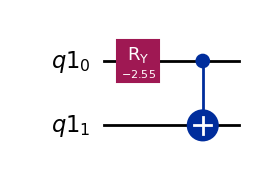

In [3]:
# Define the parameters
k=1
h=1.5
minimal_model_ground_state_circuit(k,h).draw("mpl", idle_wires=False)

# Inject energy

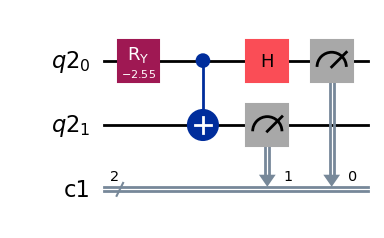

In [4]:
inject_energy_circuit(k,h).draw("mpl", idle_wires=False)

In [5]:
shots=int(1e4)

trans_inject = pm.run(inject_energy_circuit(k,h))
counts_inject = simulator.run(trans_inject, shots=shots).result().get_counts()

inject_energy_val(k,h,counts_inject,shots)

Injected energy using backend 1.2600754415067656 STD is 0.014999519992319753
Exact injected energy 1.2480754415067656


# Quantum Energy Teleportation

## Teleport XX energy

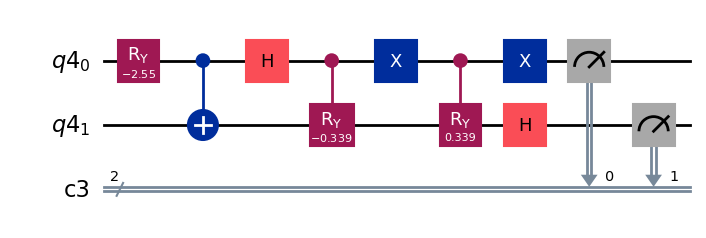

In [6]:
QET_circuit_XX(k,h).draw("mpl", idle_wires=False)

In [7]:
QET_XX = pm.run(QET_circuit_XX(k,h))
counts_XX = simulator.run(QET_XX, shots=shots).result().get_counts()

QET_energy_XX(k,h,counts_XX,shots)

Teleported XX energy is -0.4813996075495418 STD is 0.012121696910911441


(np.float64(-0.4813996075495418), np.float64(0.012121696910911441))

## Teleport Z energy

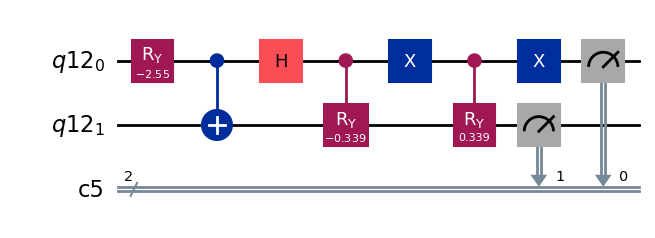

In [8]:
QET_circuit_Z(k,h).draw("mpl", idle_wires=False)

In [9]:
QET_Z = pm.run(QET_circuit_Z(k,h))
counts_Z = simulator.run(QET_Z, shots=shots).result().get_counts()

QET_energy_Z(k,h,counts_Z,shots)

Teleported Z energy is 0.3381754415067657 STD is 0.011925107924039932


(np.float64(0.3381754415067657), np.float64(0.011925107924039932))

## Evaluate teleported energy

In [10]:
QET_energy_XX(k,h,counts_XX,shots)[0]+QET_energy_Z(k,h,counts_Z,shots)[0]

Teleported XX energy is -0.4813996075495418 STD is 0.012121696910911441
Teleported Z energy is 0.3381754415067657 STD is 0.011925107924039932


np.float64(-0.1432241660427761)

# Combine QET with QST to confirm energy consumption

## Confirm energy consumption - XX term

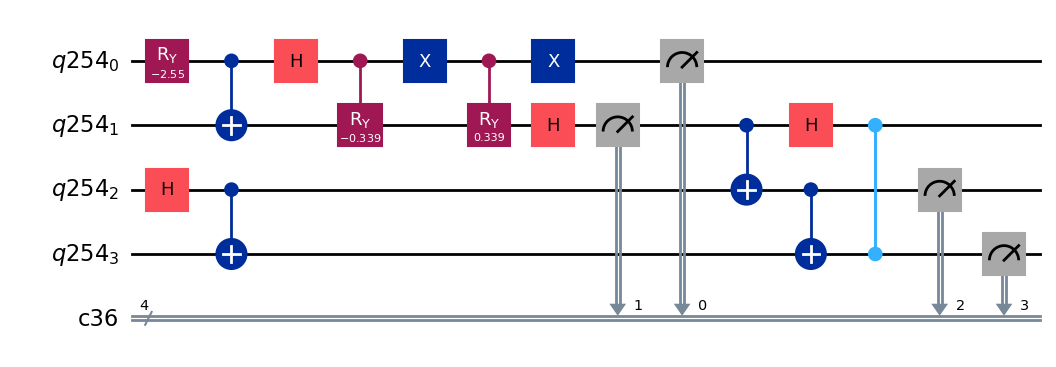

In [85]:
QET_QST_XX(k,h).draw("mpl", idle_wires=False)

In [86]:
Confirm_XX = pm.run(QET_QST_XX(k,h))
counts_XX = simulator.run(Confirm_XX, shots=shots).result().get_counts()

Confirm_XX_val(k,h,counts_XX,shots)

Confirmed XX energy is -0.4761996075495418 STD is 0.012189637566392202


(np.float64(-0.4761996075495418), np.float64(0.012189637566392202))

## Confirm energy consumption - Z term

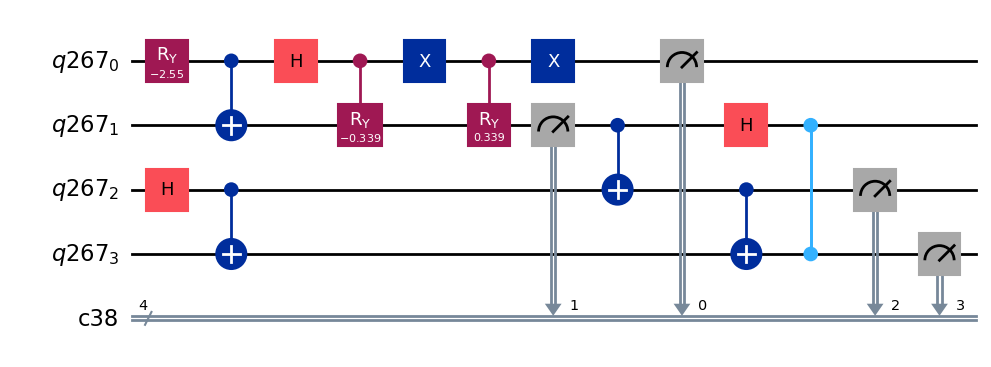

In [87]:
QET_QST_Z(k,h).draw("mpl", idle_wires=False)

In [88]:
Confirm_Z = pm.run(QET_QST_Z(k,h))
counts_Z = simulator.run(Confirm_Z, shots=shots).result().get_counts()

Confirm_Z_val(k,h,counts_Z,shots)

Confirmed Z energy is 0.34537544150676575 STD is 0.011979702458742454


(np.float64(0.34537544150676575), np.float64(0.011979702458742454))

## Evaluate consumed energy

In [89]:
Confirm_XX_val(k,h,counts_XX,shots)[0]+Confirm_Z_val(k,h,counts_Z,shots)[0]

Confirmed XX energy is -0.4761996075495418 STD is 0.012189637566392202
Confirmed Z energy is 0.34537544150676575 STD is 0.011979702458742454


np.float64(-0.13082416604277608)

## Confirmation of No Energy Consumption

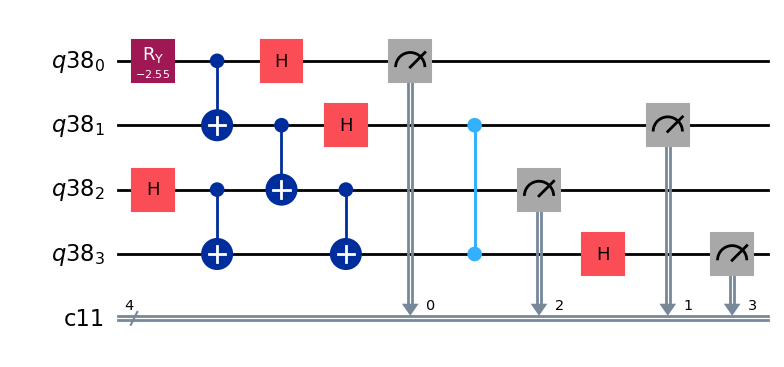

In [16]:
Confirm_NO_QET_XX(k,h).draw("mpl", idle_wires=False)

In [17]:
Confirm_XX = pm.run(Confirm_NO_QET_XX(k,h))
counts_XX = simulator.run(Confirm_XX, shots=shots).result().get_counts()

Confirm_XX_val(k,h,counts_XX,shots)

Confirmed XX energy is 0.017800392450458474 STD is 0.016758309699966757


(np.float64(0.017800392450458474), np.float64(0.016758309699966757))

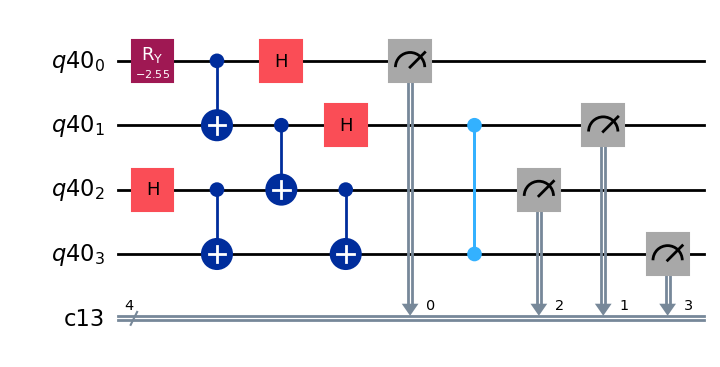

In [18]:
Confirm_NO_QET_Z(k,h).draw("mpl", idle_wires=False)

In [19]:
Confirm_Z = pm.run(Confirm_NO_QET_Z(k,h))
counts_Z = simulator.run(Confirm_Z, shots=shots).result().get_counts()

Confirm_Z_val(k,h,counts_Z,shots)

Confirmed Z energy is -0.0035245584932342144 STD is 0.00826739039842682


(np.float64(-0.0035245584932342144), np.float64(0.00826739039842682))

## Evaluate consumed energy

In [20]:
Confirm_XX_val(k,h,counts_XX,shots)[0]+Confirm_Z_val(k,h,counts_Z,shots)[0]

Confirmed XX energy is 0.017800392450458474 STD is 0.016758309699966757
Confirmed Z energy is -0.0035245584932342144 STD is 0.00826739039842682


np.float64(0.01427583395722426)

# Experiment by Quantum Computer

In [125]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, SamplerV2 as Sampler, EstimatorV2 as Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import SparsePauliOp
from qiskit.providers.jobstatus import JobStatus
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
import mthree as m3

In [ ]:
# Enable your account on Qiskit, replace 'My_API_Token' with your newly generated token
from qiskit_ibm_experiment import IBMExperimentService
My_API_Token='Your token'
IBMExperimentService.save_account(token=My_API_Token,overwrite=True)

## Quantum Hardware

In [127]:
# Initialize the Qiskit runtime service
service = QiskitRuntimeService()
available_backends=service.backends()
backend = service.least_busy()
session = Session(backend=backend)
estimator = Estimator(mode=session)
sampler = Sampler(mode=session)

# Backend details
print("Available backends:",available_backends)
print("Name:", backend.name)

Available backends: [<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_brussels')>, <IBMBackend('ibm_fez')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_marrakesh')>, <IBMBackend('ibm_sherbrooke')>, <IBMBackend('ibm_strasbourg')>, <IBMBackend('ibm_torino')>]
Name: ibm_kyiv


In [1117]:
backend = service.backend("ibm_marrakesh")
session = Session(backend=backend)
estimator = Estimator(mode=session)
sampler = Sampler(mode=session)

## Fake Hardware

In [99]:
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
#backend = FakeAlmadenV2()
#backend = Aer.get_backend('qasm_simulator')
backend = FakeSherbrooke()
shots = int(1e5)
estimator = Estimator(backend)

## M3 Quantum Error Mitigation

In [100]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
mit = m3.M3Mitigation(backend)

## Inject energy

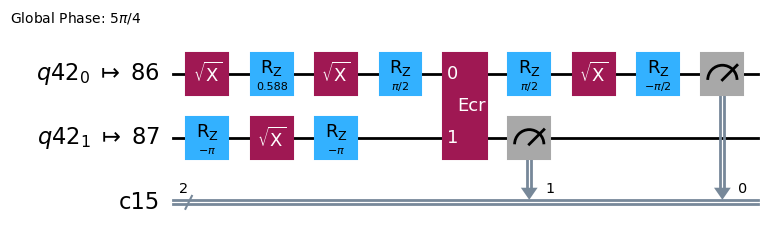

In [24]:
k=1
h=1.5

trans_inject_energy_QC = pm.run(inject_energy_circuit(k,h))
trans_inject_energy_QC.draw("mpl", idle_wires=False)

In [25]:
counts_inject_energy_QC = backend.run(trans_inject_energy_QC, shots=shots).result().get_counts()
inject_energy_val(k,h,counts_inject_energy_QC,shots)

Injected energy using backend 1.2333754415067657 STD is 0.014999279682704768
Exact injected energy 1.2480754415067656


In [26]:
mappings = m3.utils.final_measurement_mapping(trans_inject_energy_QC)
mit.cals_from_system(mappings)
quasis = mit.apply_correction(counts_inject_energy_QC, mappings,return_mitigation_overhead=True)

In [27]:
M3_QEM_Injected(k,h,quasis)

(np.float64(1.2357965121540053), 0.010295973523861553)

## QET -XX term

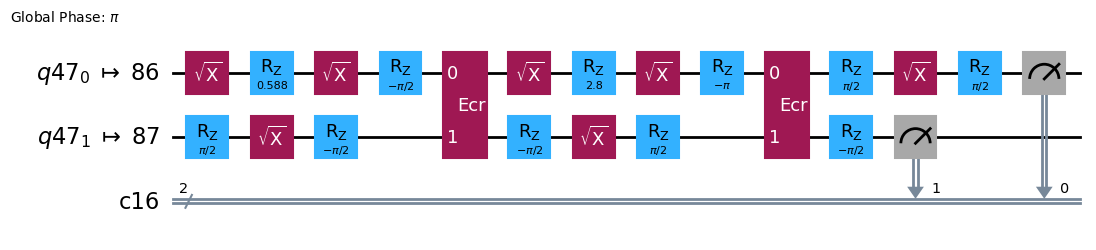

In [28]:
QET_XX_QC = pm.run(QET_circuit_XX(k,h))
QET_XX_QC.draw("mpl", idle_wires=False)

In [29]:
counts_QET_XX_QC = backend.run(QET_XX_QC, shots=shots).result().get_counts()
QET_energy_XX(k,h,counts_QET_XX_QC,shots)

Teleported XX energy is -0.4509996075495417 STD is 0.012510602863171703


(np.float64(-0.4509996075495417), np.float64(0.012510602863171703))

In [30]:
mappings = m3.utils.final_measurement_mapping(QET_XX_QC)
mit.cals_from_system(mappings)
quasis = mit.apply_correction(counts_QET_XX_QC, mappings,return_mitigation_overhead=True)

In [31]:
M3_QEM_XX(k,h,quasis)

(np.float64(-0.4947704068049128), 0.010331242134604079)

## QET -Z term

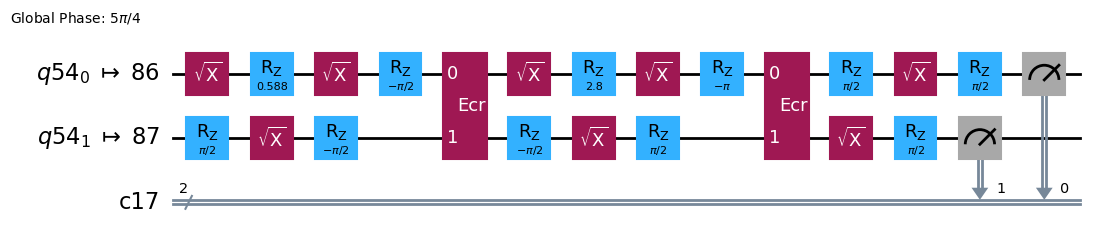

In [32]:
QET_Z_QC = pm.run(QET_circuit_Z(k,h))
QET_Z_QC.draw("mpl", idle_wires=False)

In [33]:
counts_QET_Z_QC = backend.run(QET_Z_QC, shots=shots).result().get_counts()
QET_energy_Z(k,h,counts_QET_Z_QC,shots)

Teleported Z energy is 0.36877544150676567 STD is 0.012152495669614533


(np.float64(0.36877544150676567), np.float64(0.012152495669614533))

In [34]:
mappings = m3.utils.final_measurement_mapping(QET_Z_QC)
mit.cals_from_system(mappings)
quasis = mit.apply_correction(counts_QET_Z_QC, mappings,return_mitigation_overhead=True)

In [35]:
M3_QEM_Z(k,h,quasis)

(np.float64(0.35239635506000355), 0.01027095020405495)

## Confirm XX term

In [112]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
mit = m3.M3Mitigation(backend)

In [113]:
Confirm_XX_QC = pm.run(QET_QST_XX(k,h))
counts_XX_QC = backend.run(Confirm_XX, shots=shots).result().get_counts()
Confirm_XX_val(k,h,counts_XX_QC,shots)

Confirmed XX energy is -0.3895996075495416 STD is 0.00418688308888605


(np.float64(-0.3895996075495416), np.float64(0.00418688308888605))

In [114]:
mappings = m3.utils.final_measurement_mapping(Confirm_XX_QC)
mit.cals_from_system(mappings)
quasis_XX = mit.apply_correction(counts_XX_QC, mappings,return_mitigation_overhead=True)

In [115]:
M3_QEM_Confirm_XX(k,h,quasis_XX)

(np.float64(-0.42221784504496407), 0.0034155436434054076)

## Confirm Z term

In [116]:
Confirm_Z_QC = pm.run(QET_QST_Z(k,h))
counts_Z_QC = backend.run(Confirm_Z, shots=shots).result().get_counts()
Confirm_Z_val(k,h,counts_Z_QC,shots)

Confirmed Z energy is 0.3991654415067658 STD is 0.003910692792715888


(np.float64(0.3991654415067658), np.float64(0.003910692792715888))

In [120]:
mappings = m3.utils.final_measurement_mapping(Confirm_Z_QC)
mit.cals_from_system(mappings)
quasis_Z = mit.apply_correction(counts_Z_QC, mappings,return_mitigation_overhead=True)

In [121]:
M3_QEM_Confirm_Z(k,h,quasis_Z)

(np.float64(0.3852191726240142), 0.00341268046268397)

## Confirm Energy Consumption by QST

In [122]:
M3_QEM_Confirm_XX(k,h,quasis_XX)[0]+M3_QEM_Confirm_Z(k,h,quasis_Z)[0]

np.float64(-0.036998672420949896)